In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('all_cleaned_data.csv')

In [2]:
df = pd.DataFrame(df)
df.head()

,F_mean,F_max,F_min,F_rms,F_std_dev,F_skewness,F_kurtosis,F_crest_factor,F_form_factor,I_mean,I_max,I_min,I_rms,I_std_dev,I_skewness,I_kurtosis,I_crest_factor,I_form_factor,fault_type
0,63.025424,77.0,42.0,63.370781,6.635133,-0.442525,0.238484,1.215071,1.005480,10.287534,10.68,10.11,0.095967,10.287981,1.320133,5.284514,1.038105,1.000043,N
1,62.398305,77.0,42.0,62.776777,6.912320,-0.958236,0.442123,1.226568,1.006065,10.158090,10.55,10.00,0.106420,10.158644,1.517801,5.653365,1.038524,1.000055,N
2,62.500000,77.0,51.0,62.744370,5.555855,-0.206997,-0.016095,1.227202,1.003910,10.210843,10.63,10.05,0.083545,10.211184,1.744730,7.213465,1.041015,1.000033,N
3,61.152542,77.0,42.0,61.641665,7.782983,-0.572240,-0.497159,1.249155,1.007998,10.218803,10.79,10.08,0.125373,10.219566,2.404948,9.138073,1.055818,1.000075,N
4,62.118644,77.0,42.0,62.437901,6.332887,-0.357600,0.243777,1.233225,1.005139,10.194979,10.58,10.05,0.098120,10.195449,1.327605,4.808879,1.037718,1.000046,N


In [3]:
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
# importing the models
from sklea
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost

In [5]:
df.shape

(21722, 19)

In [6]:
df.isnull().sum()

F_mean            0
F_max             0
F_min             0
F_rms             0
F_std_dev         0
F_skewness        0
F_kurtosis        0
F_crest_factor    0
F_form_factor     0
I_mean            0
I_max             0
I_min             0
I_rms             0
I_std_dev         0
I_skewness        0
I_kurtosis        0
I_crest_factor    0
I_form_factor     0
fault_type        0
dtype: int64

In [7]:
y = df['fault_type']  # Assign the 'fault_type' column to y
x = df.iloc[:, :-1]   # Exclude the last column and assign the remaining DataFrame to x


In [8]:
x

,F_mean,F_max,F_min,F_rms,F_std_dev,F_skewness,F_kurtosis,F_crest_factor,F_form_factor,I_mean,I_max,I_min,I_rms,I_std_dev,I_skewness,I_kurtosis,I_crest_factor,I_form_factor
0,63.025424,77.0,42.0,63.370781,6.635133,-0.442525,0.238484,1.215071,1.005480,10.287534,10.680,10.110,0.095967,10.287981,1.320133,5.284514,1.038105,1.000043
1,62.398305,77.0,42.0,62.776777,6.912320,-0.958236,0.442123,1.226568,1.006065,10.158090,10.550,10.000,0.106420,10.158644,1.517801,5.653365,1.038524,1.000055
2,62.500000,77.0,51.0,62.744370,5.555855,-0.206997,-0.016095,1.227202,1.003910,10.210843,10.630,10.050,0.083545,10.211184,1.744730,7.213465,1.041015,1.000033
3,61.152542,77.0,42.0,61.641665,7.782983,-0.572240,-0.497159,1.249155,1.007998,10.218803,10.790,10.080,0.125373,10.219566,2.404948,9.138073,1.055818,1.000075
4,62.118644,77.0,42.0,62.437901,6.332887,-0.357600,0.243777,1.233225,1.005139,10.194979,10.580,10.050,0.098120,10.195449,1.327605,4.808879,1.037718,1.000046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21717,46.619469,51.0,42.0,46.835997,4.518451,-0.053833,-2.033413,1.088906,1.004645,6.399857,6.446,6.376,6.399893,0.022205,0.739978,-0.256498,1.007204,1.000006
21718,47.097345,51.0,42.0,47.308066,4.480044,-0.271474,-1.961337,1.078040,1.004474,6.385071,6.428,6.342,6.385111,0.023259,-0.442045,0.673476,1.006717,1.000006
21719,47.176991,51.0,42.0,47.386287,4.468601,-0.308459,-1.939502,1.076261,1.004436,6.378786,6.428,6.325,6.378839,0.026962,0.029480,0.121228,1.007707,1.000008
21720,47.336283,60.0,42.0,47.557418,4.601263,-0.178633,-1.494528,1.261633,1.004672,6.371429,6.428,6.325,6.371490,0.028998,0.316565,-0.351807,1.008869,1.000010


Comparing the models with default hyperparameter values using Cross Validation

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [10]:
# list of models
models = [LogisticRegression(max_iter=20000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

NameError: name 'LogisticRegression' is not defined

In [11]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, x, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [13]:
compare_models_cross_validation()

c:\Users\VGAUR\.vscode\PYTHON 311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\VGAUR\.vscode\PYTHON 311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Cross Validation accuracies for the LogisticRegression(max_iter=2000) = [0.92497123 0.92635213 0.92656538 0.93370166 0.90860958]
Acccuracy score of the  LogisticRegression(max_iter=2000) = 92.4 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.94453395 0.95350978 0.9558011  0.95672192 0.93623389]
Acccuracy score of the  SVC(kernel='linear') = 94.94 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.92520138 0.92128884 0.92587477 0.93485267 0.91574586]
Acccuracy score of the  KNeighborsClassifier() = 92.46 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.90310702 0.97836594 0.97490792 0.981814   0.95372928]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 95.84 %
-----------------------------------------------------------

Comparing the models with different Hyperparameter values using GridSearchCV

In [9]:
 # List of models
models_list = [
    LogisticRegression(max_iter=20000),
    SVC(),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0)
    # XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Add XGBoost
]

NameError: name 'LogisticRegression' is not defined

In [14]:
# creating a dictionary that contains hyperparameter values for the above mentioned models


model_hyperparameters = {
    

    'log_reg_hyperparameters': {
        
        'C' : [1,5,10,20]
    },

    'svc_hyperparameters': {
        
        'kernel' : ['linear','poly','rbf','sigmoid'],
        'C' : [1,5,10,20]
    },


    'KNN_hyperparameters' : {
        
        'n_neighbors' : [3,5,10]
    },


    'random_forest_hyperparameters' : {
        
        'n_estimators' : [10, 20, 50, 100]
    }
    # , 'xgboost_hyperparameters': {
    #     'n_estimators': [50, 100, 200],
        
         
    # }
}

In [16]:
type(model_hyperparameters)

dict

In [17]:
print(model_hyperparameters.keys())

dict_keys(['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters'])


In [18]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters']


Applying GridSearchCV

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [16]:
def ModelSelection(list_of_models, hyperparameters_dictionary):

  result = []

  i = 0

  for model in list_of_models:

    key = model_keys[i]

    params = hyperparameters_dictionary[key]

    i += 1

    print(model)
    print(params)
    print('---------------------------------')


    classifier = GridSearchCV(model, params, cv=5)

    # fitting the data to classifier
    x_scaled = scaler.fit_transform(x)
    classifier.fit(x_scaled,y)

    result.append({
        'model used' : model,
        'highest score' : classifier.best_score_,
        'best hyperparameters' : classifier.best_params_
    })

  result_dataframe = pd.DataFrame(result, columns = ['model used','highest score','best hyperparameters'])

  return result_dataframe

In [21]:
results = ModelSelection(models_list, model_hyperparameters )
print(results)


LogisticRegression(max_iter=20000)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------
                               model used  highest score  \
0      LogisticRegression(max_iter=20000)       0.947013   
1                                   SVC()       0.955253   
2                  KNeighborsClassifier()       0.922798   
3  RandomForestClassifier(random_state=0)       0.958845   

         best hyperparameters  
0                   {'C': 20}  
1  {'C': 10, 'kernel': 'rbf'}  
2          {'n_neighbors': 3}  
3        {'n_estimators': 10}  


till now best algorith is randomforest classifier 

In [1]:
from sklearn.ensemble import RandomForestClassifier
 
 
clf = RandomForestClassifier( random_state=0 , n_estimators=
10)
# clf.fit(X, y)

In [18]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [10]:
y_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import  precision_score,\
recall_score, f1_score, accuracy_score

In [21]:
print("Accuracy:", accuracy_score(y_test, 
								y_pred)) 


Accuracy: 0.9779056386651324


In [22]:
print("Precision:", precision_score(y_test, 
									y_pred, 
									average="weighted")) 

print('Recall:', recall_score(y_test, 
							y_pred, 
							average="weighted")) 


Precision: 0.978345514005896
Recall: 0.9779056386651324


In [23]:
# calculating f1 score 
print('F1 score:', f1_score(y_test, y_pred, 
							average="weighted")) 


F1 score: 0.9778093253041736


In [24]:
# import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_test,y_pred)

# cm_display = metrics.ConfusionMatrixDisplay( 
# 	confusion_matrix=confusion_matrix, 
# 	display_labels=[0, 1, 2]) 

# cm_display.plot() 
# plt.show() 
cm

array([[107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, 188,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0, 102,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 131,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  92,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

In [26]:
cm.shape

(30, 30)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00       107
          t1       0.99      0.99      0.99       189
         t10       1.00      1.00      1.00       102
         t11       0.98      1.00      0.99       127
         t12       1.00      0.99      1.00       132
         t13       0.99      1.00      0.99        92
         t14       0.99      1.00      1.00       131
         t15       0.77      0.88      0.82       149
         t16       0.79      0.66      0.72       100
         t17       0.99      0.98      0.99       167
         t18       1.00      1.00      1.00       160
         t19       0.97      0.99      0.98       171
          t2       0.99      0.97      0.98       163
         t20       0.94      0.92      0.93       129
         t21       0.98      0.93      0.96       152
         t22       0.98      0.98      0.98        65
         t23       0.99      1.00      1.00       151
         t24       1.00    

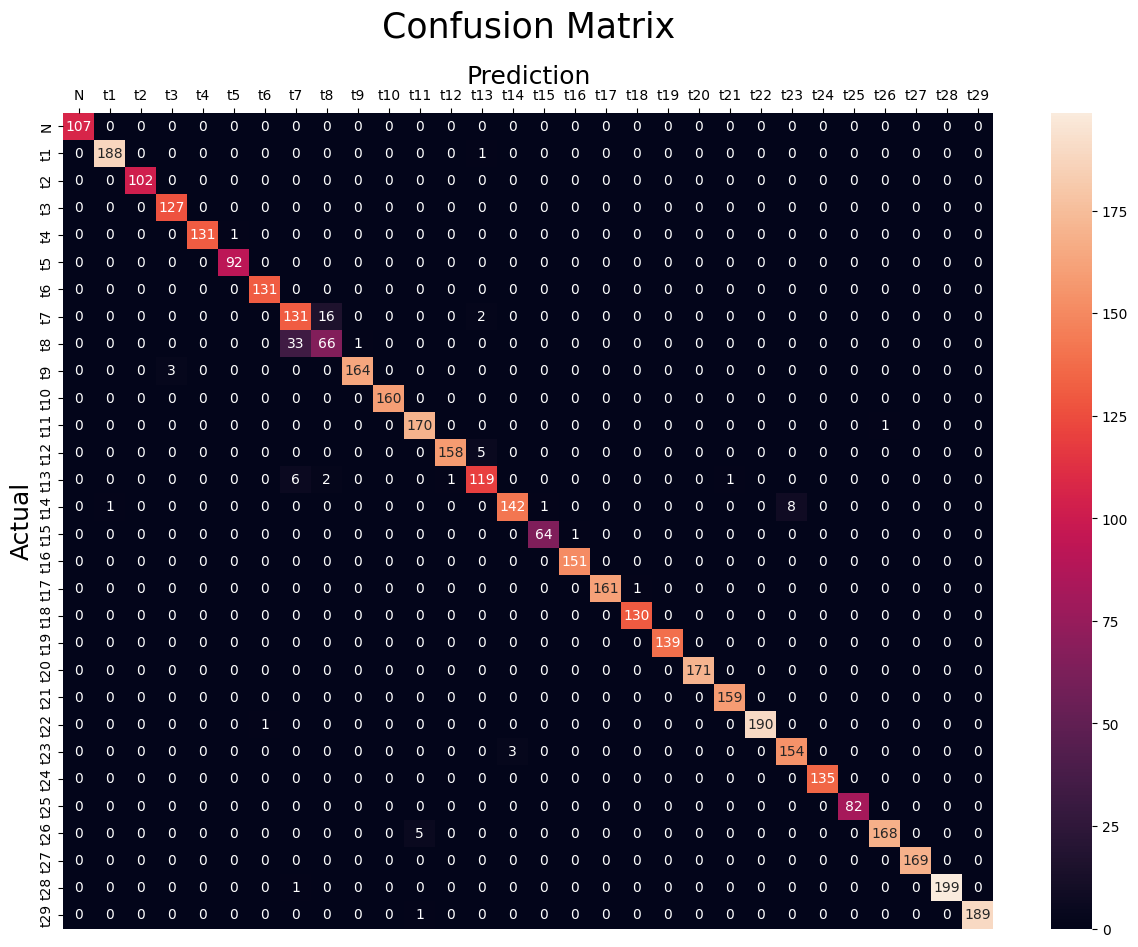

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example labels (modify as needed)
labels = [
    'N','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29'
]

plt.figure(figsize=(15, 12))

# Replace `cm` with your confusion matrix data
sns.heatmap(cm, 
            annot=True, 
            fmt='g', 
            xticklabels=labels, 
            yticklabels=labels)

# Add axis labels and title
plt.ylabel('Actual', fontsize=18)
plt.xlabel('Prediction', fontsize=18)
plt.title('Confusion Matrix', fontsize=25, pad=20)

# Adjust the x-axis to appear at the top
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()

# Adjust layout for clarity
plt.gca().figure.subplots_adjust(bottom=0.2)

# Optionally add a center-aligned label below the heatmap
# plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

# Show the plot
plt.show()


AUC and ROC 

In [35]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Example true labels and predicted probabilities
# y_test contains categorical labels like 't1', 't2', etc.
 

# Classes (e.g., 't1', 't2', 't3')
classes = [
    'N','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10','t11','t12','t13','t14','t15','t16','t17','t18','t19','t20','t21','t22','t23','t24','t25','t26','t27','t28','t29'
]

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=classes)
y_pre_binarized = label_binarize(y_pred, classes=classes)

# Calculate the ROC AUC score
auc = roc_auc_score(y_test_binarized, y_pre_binarized, average='macro', multi_class='ovr')

print("AUC for our sample data is {:.2f}".format(auc))


AUC for our sample data is 0.99


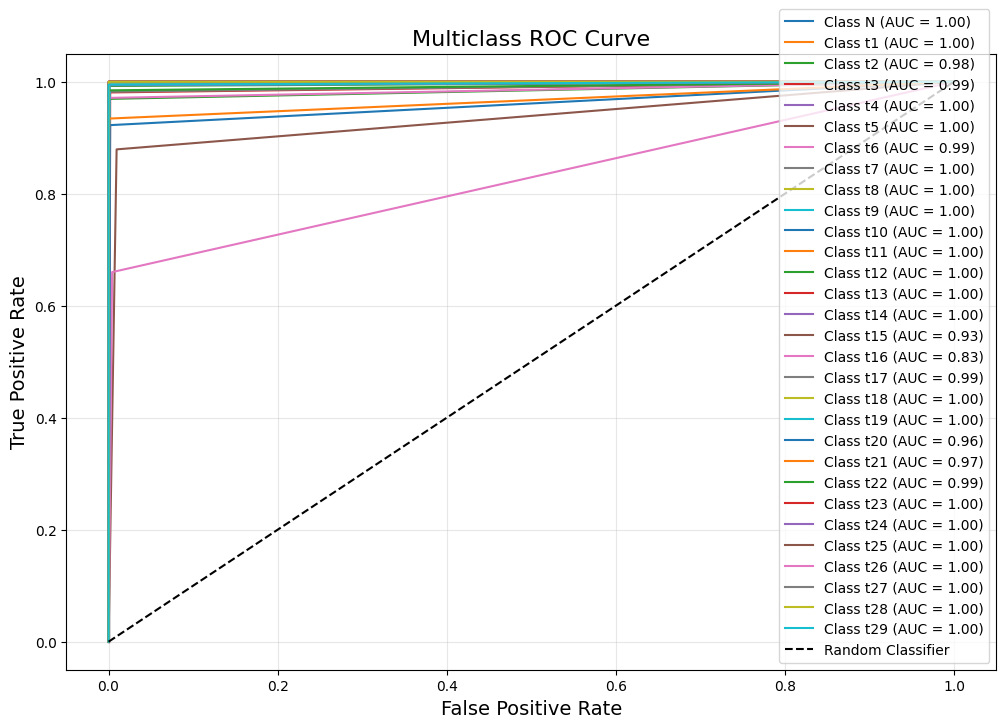

In [37]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

 

 
 

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], [p[i] for p in y_pre_binarized])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(12, 8))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

# # Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

# Add labels, title, and legend
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Multiclass ROC Curve", fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()
